In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')
import random
import numpy as np

import SPQR
import printers
import triconnected_components as tcc 
finder = tcc.TriconnectedFinder()

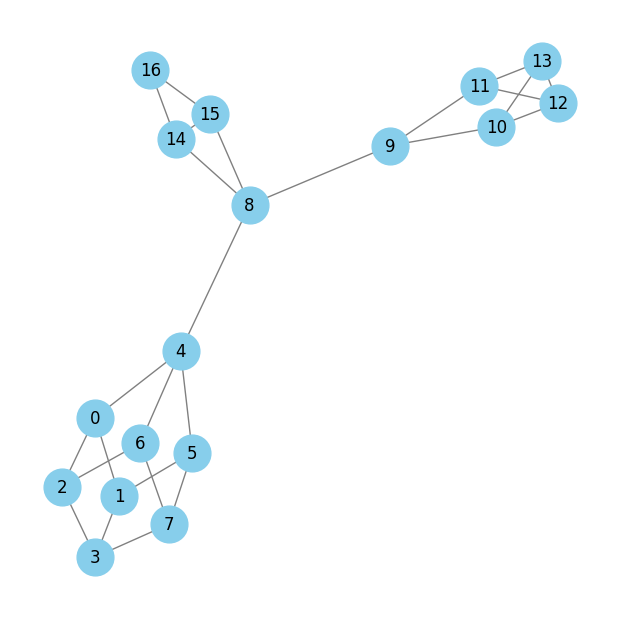

In [2]:
### CREATE A GRAPH G ###

import networkx as nx
import matplotlib.pyplot as plt

edges = [
    # Magenta cube (top left)
    (0, 1), (0, 2), (1, 3), (2, 3),
    (0, 4), (1, 5), (2, 6), (3, 7),
    (4, 5), (4, 6), (5, 7), (6, 7),

    # Yellow vertical edge
    (4, 8),

    # Red horizontal edge
    (8, 9),

    # Blue cube (middle right)
    (9, 10), (9, 11), (10, 12), (11, 13),
    (12, 13), (10, 13), (11, 12),

    # Green pyramid (bottom)
    (8, 14), (8, 15), (14, 15), (14, 16), (15, 16)
]

G = nx.Graph()
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

{'real_edges': [(14, 15)], 'virtual_edges': [(10, 11)]}
Image saved to: images\SPQR_tree.png


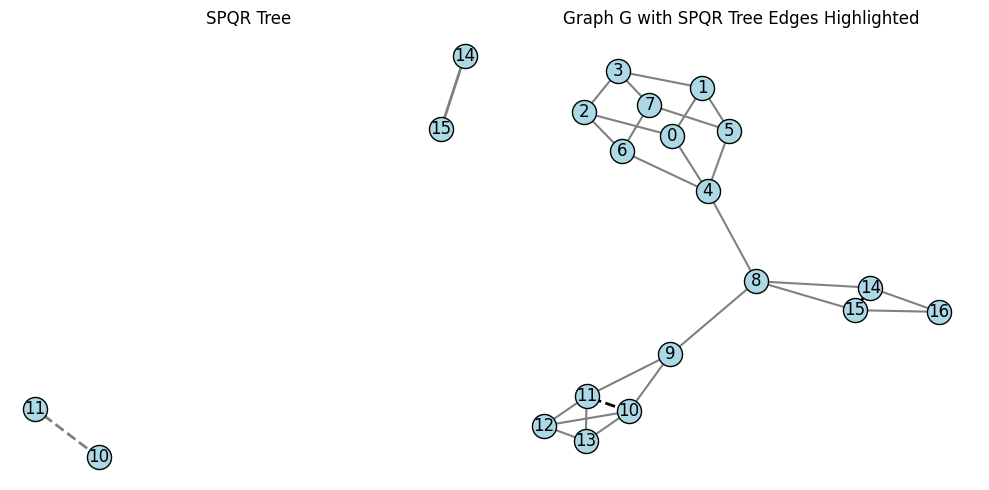

In [3]:
TCCs, info = finder.triconnected_comps(G)

# Flatten the list of lists of separation pairs
all_sep_pairs = [pair for sublist in info["sep_pairs"] for pair in sublist]

edges_dict, SPQR_tree = SPQR.get_SPQR_tree(G, TCCs, all_sep_pairs) 
print(edges_dict)
printers.SPQR_drawer.plot_SPQR_visuals(G, edges_dict, SPQR_tree, save=True)

In [4]:
print(TCCs)
print(edges_dict)

[{'node_list': frozenset({10, 11, 12, 13}), 'virtual_edges': [(10, 11)]}, {'node_list': frozenset({9, 10, 11}), 'virtual_edges': [(10, 11)]}, {'node_list': frozenset({8, 14, 15}), 'virtual_edges': []}, {'node_list': frozenset({16, 14, 15}), 'virtual_edges': []}, {'node_list': frozenset({0, 1, 2, 3, 4, 5, 6, 7}), 'virtual_edges': []}]
{'real_edges': [(14, 15)], 'virtual_edges': [(10, 11)]}


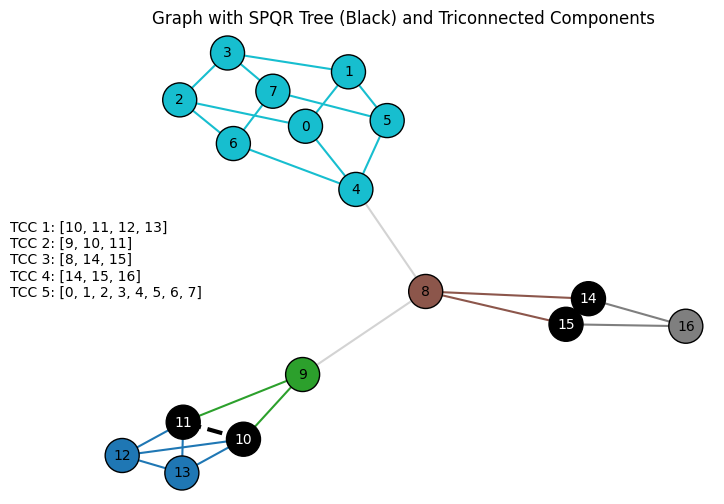

In [5]:
# TODO PENSAR COMO TRATAR LOS TCCs DE TRES NODOS, QUE SON REALMENTE GRAFOS CADENA.
printers.SPQR_drawer.plot_SPQR_and_TCC(G, TCCs, edges_dict, SPQR_tree, save=True) ### TODO CHECKEAR A VECES QUE NO SALEN TODOS LOS VIRTUAL EN EL SPQR TREE CREO QUE ES PORQUE SOLO SE TIENE EN CUENTA LA PRIMERA COMPONENTE TRICONECTADA